In [66]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data_licence = pd.read_csv("licence.csv")
data_master = pd.read_csv("masters.csv")

Nettoyage et structuration des données:

In [39]:
parcours = [
    "Comptabilité", 
    "Management", 
    "Mathématiques Appliquées à l’Analyse des Données et à l’Aide à la Décision", 
    "Business Intelligence", 
    "Business Information Systems"
]
data_licence.insert(0, "Parcours", parcours[:len(data_licence)])

In [40]:
# Sélectionner la colonne 'Parcours' et toutes les colonnes commençant par 'Semestre'
modules_licence = data_licence[['Parcours'] + [col for col in data_licence.columns if 'Semestre' in col]]
# Fusionner les colonnes 'Semestre 1', 'Semestre 2', ... en une seule colonne 'Modules'
modules_licence['Modules'] = modules_licence.iloc[:, 1:].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Supprimer les anciennes colonnes 'Semestre 1', 'Semestre 2', ...
modules_licence = modules_licence[['Parcours', 'Modules']]

# Vérifier les premières lignes du DataFrame
modules_licence.head()


C:\Users\Asma\AppData\Local\Temp\ipykernel_17472\2566598391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modules_licence['Modules'] = modules_licence.iloc[:, 1:].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)


,Parcours,Modules
0,Comptabilité,"Principes de gestion 1, Comptabilité financièr..."
1,Management,"Principes de gestion 1, Comptabilité financièr..."
2,Mathématiques Appliquées à l’Analyse des Donné...,"Algèbre 1, Analyse 1, Base de données, Program..."
3,Business Intelligence,Algorithmique et Structures de Données 1\nSyst...
4,Business Information Systems,Algorithmique et Structures de Données 1\nSyst...


In [41]:
# Sélectionner la colonne 'Parcours' et toutes les colonnes commençant par 'Semestre'
modules_master = data_master[['Parcours'] + [col for col in data_master.columns if 'Semestre' in col]]
# Fusionner les colonnes 'Semestre 1', 'Semestre 2', ... en une seule colonne 'Modules'
modules_master['Modules'] = modules_master.iloc[:, 1:].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Supprimer les anciennes colonnes 'Semestre 1', 'Semestre 2', ...
modules_master = modules_master[['Parcours', 'Modules']]

# Vérifier les premières lignes du DataFrame
modules_master.head()

C:\Users\Asma\AppData\Local\Temp\ipykernel_17472\933239129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modules_master['Modules'] = modules_master.iloc[:, 1:].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)


,Parcours,Modules
0,marketing digital,Management stratégique et transition digitale\...
1,"Comptabilité, Contrôle, Audit",Commissariat aux comptes Normes internationale...
2,Management Digital et Systèmes d’Information,Architecture des systèmes d’information\nManag...
3,Gestion Actuarielle et Modélisation Mathématique,"Modèles linéaires généralisés, Séries temporel..."
4,Finance Digitale,"Big Data, Inclusion financière, Finance intern..."


In [42]:
data_modules = pd.concat([modules_licence, modules_master], ignore_index=True)
data_modules


,Parcours,Modules
0,Comptabilité,"Principes de gestion 1, Comptabilité financièr..."
1,Management,"Principes de gestion 1, Comptabilité financièr..."
2,Mathématiques Appliquées à l’Analyse des Donné...,"Algèbre 1, Analyse 1, Base de données, Program..."
3,Business Intelligence,Algorithmique et Structures de Données 1\nSyst...
4,Business Information Systems,Algorithmique et Structures de Données 1\nSyst...
5,marketing digital,Management stratégique et transition digitale\...
6,"Comptabilité, Contrôle, Audit",Commissariat aux comptes Normes internationale...
7,Management Digital et Systèmes d’Information,Architecture des systèmes d’information\nManag...
8,Gestion Actuarielle et Modélisation Mathématique,"Modèles linéaires généralisés, Séries temporel..."
9,Finance Digitale,"Big Data, Inclusion financière, Finance intern..."


In [43]:
data_modules["Parcours"]= data_modules["Parcours"].replace({
    "Comptabilité": "LSGC",
    "Management": "LSGM",
    "Mathématiques Appliquées à l’Analyse des Données et à l’Aide à la Décision": "LMAD",
    "Business Intelligence": "BI",
    "Business Information Systems": "BIS",
    "marketing digital": "MKD",
    "Comptabilité, Contrôle, Audit": "CCA",
    "Management Digital et Systèmes d’Information": "MDSI",
    "Gestion Actuarielle et Modélisation Mathématique": "GAMMA",
    "Finance Digitale": "FIND",
    "Business Analytics": "BA"
})


data_modules

,Parcours,Modules
0,LSGC,"Principes de gestion 1, Comptabilité financièr..."
1,LSGM,"Principes de gestion 1, Comptabilité financièr..."
2,LMAD,"Algèbre 1, Analyse 1, Base de données, Program..."
3,BI,Algorithmique et Structures de Données 1\nSyst...
4,BIS,Algorithmique et Structures de Données 1\nSyst...
5,MKD,Management stratégique et transition digitale\...
6,CCA,Commissariat aux comptes Normes internationale...
7,MDSI,Architecture des systèmes d’information\nManag...
8,GAMMA,"Modèles linéaires généralisés, Séries temporel..."
9,FIND,"Big Data, Inclusion financière, Finance intern..."


In [74]:
# Supprimer les chiffres romains (I, II, III, IV, ...) et les espaces qui les entourent
data_modules['Modules'] = data_modules['Modules'].str.replace(r'\s?I{1,3}\s?', '', regex=True)


# Supprimer les nombres dans la colonne 'Modules'
data_modules['Modules'] = data_modules['Modules'].apply(lambda x: re.sub(r'\d+', '', x))

# Nettoyer les espaces superflus et uniformiser les valeurs
data_modules['Modules'] = data_modules['Modules'].str.strip().str.lower()

In [75]:
# Remplacer les séparateurs ',' et '/' par une virgule ','
data_modules['Modules'] = data_modules['Modules'].str.replace(r'[,/]', ',', regex=True)

# Convertir la colonne 'Modules' en liste en séparant les éléments par la virgule
data_modules['Modules'] = data_modules['Modules'].str.split(',')

# Exploser la colonne 'Modules' pour créer une ligne par module
data_modules = data_modules.explode('Modules')

# Réinitialiser les indices
data_modules = data_modules.reset_index(drop=True)

# Vérifier le résultat
print(data_modules.head(10))


  Parcours                    Modules
0     LSGC       principes de gestion
1     LSGC    comptabilité financière
2     LSGC              microéconomie
3     LSGC               mathématique
4     LSGC       ntroduction au droit
5     LSGC  mathématiques financières
6     LSGC                    anglais
7     LSGC            aptitudes en tc
8     LSGC       principes de gestion
9     LSGC    comptabilité financière


Analyse descriptive

In [76]:
# Résumé général
print(data_modules.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Parcours  223 non-null    object
 1   Modules   223 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB
None


In [77]:
# Nombre de lignes et colonnes
print(f"Nombre de lignes: {data_modules.shape[0]}, Nombre de colonnes: {data_modules.shape[1]}")

Nombre de lignes: 223, Nombre de colonnes: 2


In [78]:
# Vérifier les valeurs manquantes
print(data_modules.isnull().sum())

Parcours    0
Modules     0
dtype: int64


In [79]:
# Modalités 
modalites = data_modules['Modules'].unique()
print("Modalités :")
modalites

Modalités :


array(['principes de gestion', 'comptabilité financière', 'microéconomie',
       'mathématique', 'ntroduction au droit',
       'mathématiques financières', 'anglais', 'aptitudes en tc',
       'statistique descriptive et calculs de probabilité',
       'macroéconomie', 'droit des sociétés commerciales',
       'comptabilité intermédiaire', 'comptabilité de gestion',
       'séminaire métiers', 'anglais des affaires',
       'culture entrepreneuriale', 'droit des affaires',
       'économie des affaires', 'contrôle interne',
       'tva et droit de consommation',
       'méthodologie d’élaboration d’un rapport de stage',
       'projet professionnel et personnel',
       'droit des obligations et des sûretés', 'management des projets',
       'comptabilité avancée',
       'cadre conceptuel et présentation des états financiers',
       'contrôle de gestion',
       'élaboration et validation du rapport de stage',
       'anglais comptable et financier',
       'préparation à la vie pr

In [80]:
# Effectif par module
effectifs = data_modules['Modules'].value_counts()
print("Effectifs :")
effectifs

Effectifs :


Modules
anglais                                                                                                                                                                                                                                                                                       13
séminaire                                                                                                                                                                                                                                                                                      7
projet tutoré                                                                                                                                                                                                                                                                                  5
projet intégré                                                                                                               

In [81]:
# Fréquences relatives
frequences = data_modules['Modules'].value_counts(normalize=True)
print("Fréquences relatives :")
frequences

Fréquences relatives :


Modules
anglais                                                                                                                                                                                                                                                                                       0.058296
séminaire                                                                                                                                                                                                                                                                                     0.031390
projet tutoré                                                                                                                                                                                                                                                                                 0.022422
projet intégré                                                                                             

In [82]:
# Pourcentages
pourcentages = frequences * 100
print("Pourcentages :")
print(pourcentages)

Pourcentages :
Modules
anglais                                                                                                                                                                                                                                                                                       5.829596
séminaire                                                                                                                                                                                                                                                                                     3.139013
projet tutoré                                                                                                                                                                                                                                                                                 2.242152
projet intégré                                                                              

In [83]:
# Tableau statistique
tableau_statistique = pd.DataFrame({
    'Effectif': effectifs,
    'Fréquence Relative': frequences,
    'Pourcentage': pourcentages
})

# Réorganiser l'ordre des colonnes et ajouter un index propre
tableau_statistique = tableau_statistique.reset_index().rename(columns={'index': 'Module'})
print("Tableau Statistique :")
tableau_statistique.head()

Tableau Statistique :


,Modules,Effectif,Fréquence Relative,Pourcentage
0,anglais,13,0.058296,5.829596
1,séminaire,7,0.031390,3.139013
2,projet tutoré,5,0.022422,2.242152
3,projet intégré,5,0.022422,2.242152
4,aptitudes en tc,4,0.017937,1.793722


Représentation graphique: 

C:\Users\Asma\AppData\Local\Temp\ipykernel_17472\1277661380.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Effectif', y='Modules', data=top_modules, palette="viridis")


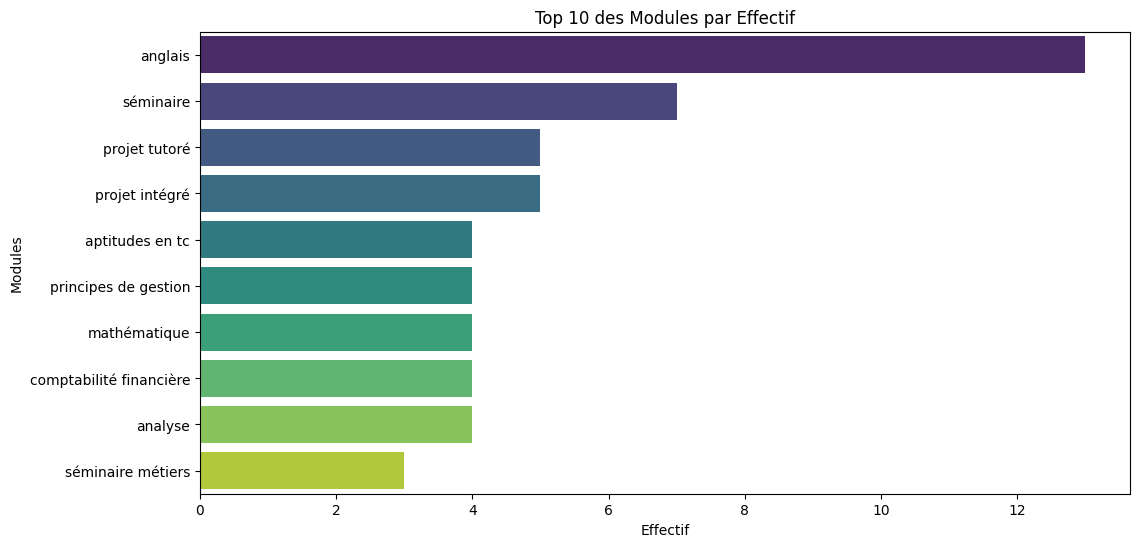

In [84]:
#Diagramme en Barres
# Top 10 des modules les plus fréquents
top_modules = tableau_statistique.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Effectif', y='Modules', data=top_modules, palette="viridis")
plt.title("Top 10 des Modules par Effectif")
plt.xlabel("Effectif")
plt.ylabel("Modules")
plt.show()

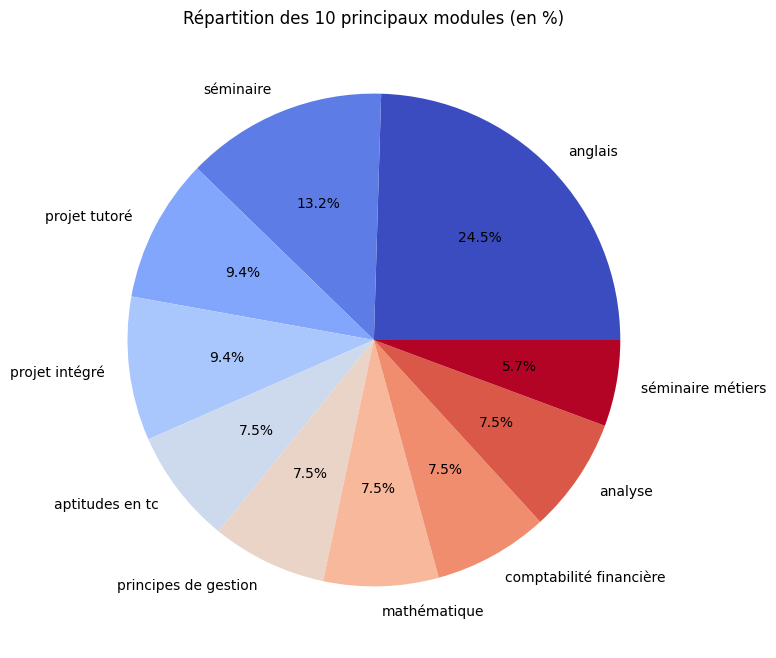

In [85]:
# Diagramme circulaire
tableau_statistique.set_index('Modules')['Pourcentage'].head(10).plot.pie(
    autopct='%1.1f%%', figsize=(8, 8), cmap='coolwarm')
plt.title("Répartition des 10 principaux modules (en %)")
plt.ylabel("")
plt.show()